# Digit Recognaization

In [1]:
import warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense,Dropout,Activation

Using TensorFlow backend.


In [2]:
train_data = pd.read_csv('D:/AI_stuff/Assinments/Asignments/Digit Recognizer/train.csv')
test_data = pd.read_csv('D:/AI_stuff/Assinments/Asignments/Digit Recognizer/test.csv')

In [3]:
print(train_data.head(5))
print(test_data.head(5))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [4]:
#print target label unique values
import numpy as np
print(np.unique(train_data['label']))

[0 1 2 3 4 5 6 7 8 9]


In [5]:
# Divide the perdictors and response variables
X_train = train_data.iloc[:,1:785]

In [7]:
print(X_train.head())

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0   

In [8]:
y_train = train_data.label

In [10]:
print(y_train[:5])

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64


In [11]:
#convert response variable to categorical as one hot encoding
import keras
y_train = keras.utils.to_categorical(y_train,num_classes = 10)

In [12]:
# Normalizing tarin and test data so that variance will be on same on scale
from sklearn.preprocessing import normalize
X_train = normalize(X_train)

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.1,random_state = 42)

In [15]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)

X_val = X_val.reshape(X_val.shape[0],28,28,1)

In [16]:
from keras.layers import Conv2D, MaxPooling2D,Flatten,Reshape
from keras.optimizers import SGD

input_shape = X_train.shape[1]
model = Sequential()

model.add(Conv2D(32, kernel_size= (3,3),activation = 'relu',input_shape = (28,28,1) ))
model.add(Conv2D(32,  kernel_size= (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size= (3,3), activation='relu'))
model.add(Conv2D(64, kernel_size= (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)





In [17]:

model.fit(X_train, y_train, batch_size=32, epochs=10)


Epoch 1/10
37800/37800 [==============================] - 157s 4ms/step - loss: 0.7757
Epoch 2/10
37800/37800 [==============================] - 150s 4ms/step - loss: 0.1524
Epoch 3/10
37800/37800 [==============================] - 147s 4ms/step - loss: 0.1109
Epoch 4/10
37800/37800 [==============================] - 144s 4ms/step - loss: 0.0864
Epoch 5/10
37800/37800 [==============================] - 147s 4ms/step - loss: 0.0767
Epoch 6/10
37800/37800 [==============================] - 148s 4ms/step - loss: 0.0657
Epoch 7/10
37800/37800 [==============================] - ETA: 0s - loss: 0.060 - 151s 4ms/step - loss: 0.0602
Epoch 8/10
37800/37800 [==============================] - 154s 4ms/step - loss: 0.0538
Epoch 9/10
37800/37800 [==============================] - 164s 4ms/step - loss: 0.0481
Epoch 10/10
37800/37800 [==============================] - 170s 5ms/step - loss: 0.0472


In [25]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

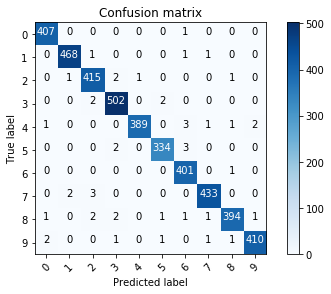

In [26]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [28]:
X_test = test_data

X_test = normalize(X_test)

In [34]:
X_test = X_test.reshape(X_test.shape[0],28,28,1)
score = model.predict(X_test)

In [35]:
score = np.argmax(score,axis = 1)
score = pd.Series(score,name="Label")

In [36]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),score],axis = 1)

submission.to_csv("D:/AI_stuff/Assinments/Asignments/Digit Recognizer/digit_recognizer.csv",index=False)